# I. Introduction to python

## 1. An Introductory example

In [1]:
#Exercice 1

def factorial(n):
    if n == 0:
        return 1
    a = 1
    for i in range(2,n+1):
        a *= i
    return a

factorial(10)

3628800

A function that generates one draw of the binomial random variable $Y \sim Bin(n,p).$<br>
If $\textbf{U}$ is uniform on $(0,1)$ and $p \in (0,1)$, then the expression $U < p$ evaluates to True with probability $p$.

In [2]:
#Exercice 2

from numpy.random import uniform
def binomial_rv(n,p):
    return sum([uniform(0,1) < p for _ in range(n)])
for _ in range(100):
    print(binomial_rv(100,0.3),end=",")

29,25,35,40,31,35,21,33,26,37,32,31,33,30,33,32,26,35,28,33,36,34,28,31,32,39,35,34,36,31,34,25,27,21,28,38,26,20,27,37,31,21,29,28,31,30,34,30,18,28,33,28,35,35,33,29,31,30,35,32,32,33,35,24,24,27,24,37,29,42,31,33,36,33,30,33,31,36,27,25,35,33,26,33,33,34,26,23,30,31,31,31,32,29,29,27,24,31,31,31,

$\textbf{An approximation of $\pi$ using the Monte-Carlo simulation}.$

The main idea is to create a disk inscribed in a square, then randomly generate a lot of points. The proportion
of dots that are within the disk represent it's area, and because we know the radius of the disk, we can approximate $\pi$.

We will be creating an array containing many couples of variables representing the coordinates of each point,
then we calculate whether the point is within the disk or not.
Each point $(x,y)$ is a bivariate uniform random variable on the unit square, $(x,y)\in (0,1)^2$, and the disk is defined by
$$\left \{(x,y)\in \mathbb{R}^2 ; \left(x-\dfrac{1}{2}\right)^2 + \left(y-\dfrac{1}{2}\right)^2 \leq \left(\dfrac{1}{2}\right)^2 \right \}$$
The more points we have the better the approximation.

In [1]:
#Exercice 3

import numpy as np

def monte_carlo_pi(trials):
    b_uniform = ((np.random.uniform(0,1), np.random.uniform(0,1)) for _ in range(trials))
    s = sum(((x-0.5)**2 + (y-0.5)**2 <= 0.25 for x,y in b_uniform))
    return 4*s/trials
monte_carlo_pi(100000)

3.14716

A program that prints one realization of the following random device:

>- Flip an unbiased coin 10 times.
>- If 3 consecutive heads occur one or more times within this sequence, pay one dollar.
>- If not, pay nothing.

In [4]:
#Exercice 4

def random_device(flips=10,p=0.5): #You can change the number of flips and the probability of getting heads.
    results = [uniform(0,1) < p for _ in range(flips)] #A flip is simulated using the uniform distribution.
    counter = 0
    for e in results:
        if e==True:
            counter += 1
        else:
            counter = 0
        if counter == 3: #Once you have 3 consecutive heads, pay one dollar
            return f"pay 1 dollar: {results}"
    return f"pay 0 dollar: {results}"
random_device()    

'pay 1 dollar: [False, True, True, True, False, False, False, True, False, False]'

Simulation and plot of the correlated time series:<br>
$$\displaystyle{x_{t+1}=\alpha x_{t}+\epsilon_{t+1}} \hspace{1cm} s.t. \hspace{1cm} x_{0}=0 \hspace{1cm} and \hspace{1cm} t=0,\cdots,T$$
The sequence of shocks $\left\{\epsilon_{t} \right\}$ is assumed to be i.i.d and standard normal.

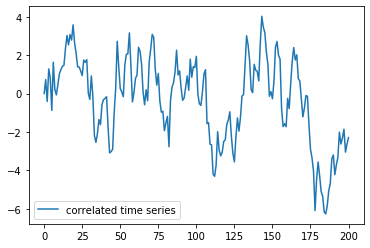

In [5]:
#Execrice 5

import matplotlib.pyplot as plt
%matplotlib inline

def c_time_series(x0=0,alpha=0.9,time_range=200):# initial values: alpha =0.9, x0=0 and T=200
    results = [x0]
    for i in range(time_range):
        results.append((lambda x:alpha*x + np.random.randn())(results[-1]))# randn() is equivalent to normal(0,1)
    return (range(time_range+1),results)# This way you can change the time range, x0 and alpha
plt.plot(*c_time_series(),label='correlated time series')# ploting  [x=0,...,T;y=x0,...,xT]
plt.legend()
plt.show()

A modulo randomness photo generated using the function in exercice 5

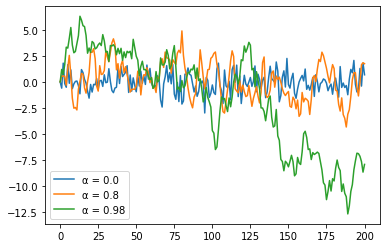

In [6]:
#Exercice 6

plt.plot(*c_time_series(alpha=0.0),label='α = 0.0')
plt.plot(*c_time_series(alpha=0.8),label='α = 0.8')
plt.plot(*c_time_series(alpha=0.98),label='α = 0.98')
plt.legend()
plt.show()

## 2. Python essentials

In [7]:
# Exercice 1

#part 1 (inner product of two lists)
from random import randrange

def inner_product(l1,l2):
    if len(l1) != len(l2):
        return "lists needs to be of same size"
    return sum(i*j for i,j in zip(l1,l2))
l1 = [randrange(0,20) for _ in range(10)]
l2 = [randrange(-10,10) for _ in range(10)]
print(inner_product(l1,l2))

#part 2 (count the number of even numbers within a sequence in one line)
print((lambda l:sum(i%2 == 0 for i in l))(range(10,110,3)))

#part 3 (given a pair ((a,b),(c,d),(e,f),...) count the number of pairs (x,y) such that both x and y are even)
l = ((2,4),(6,5),(8,8),(0,9),(13,12),(1,1),(4,160))
print((lambda l:sum([x%2 == 0 and y%2 == 0 for x,y in l]))(l))

-286
17
3


In [8]:
#Exercice 2

from math import sqrt
def p(x, coeff):
    return sum([element*(x)**i for i,element in enumerate(coeff)])

l = [1,1,1]
print(p(complex(-0.5,sqrt(3)/2),l))

(1.1102230246251565e-16+0j)


In [9]:
#Exercice 3

def count_capital_letters(s):
    return sum([e == e.upper() for e in s if e.isalpha()])

count_capital_letters('Hola AmIgo!')

3

In [10]:
#Exercice 4

def is_included(seq_a,seq_b):
    for i in seq_a:
        if i not in seq_b:
            return False
        continue
    return True
print(is_included('abcd','redsqazwxvcvb'))
print(is_included([1,6,9],[2,3,4,5,90,7,7,6,0,1]))

True
False


**Approximation of the value of $f(x)$ using linear interpolation**<br>

The following exercice calculates the value of a function $f$ at a certain point $x\in\left[a,b\right]\subset\mathbb{R}$.
The function "interval_partition" is used to divide the interval $\left[a,b\right]$ to $n$ equal sub-intervals, the function "closest_points" finds the closest points $\alpha,\beta \in \left[a,b\right]$ s.t $\alpha < x < \beta$.<br>
The main idea behind linear interpolation is to suppose that $f(x)$ is on the strait line joining $f(\alpha)$ and $f(\beta)$, then calculate $f(x)$ using the slope of the line: 
$$f(x) = \dfrac{f(\beta) - f(\alpha)}{\beta - \alpha}\left(x-\alpha\right) + f(\alpha)$$

In [11]:
#Exercice 5

def f(val):
    return val**2 + val/2 - 1

def interval_partition(interval,grid_size):
    step = (len(interval)-1)/grid_size
    result = [interval[0]]
    for _ in range(grid_size-1):
        result.append(result[-1]+step)
    return result

def closest_points(x,l):
    for e in l:
        if x>e:
            continue
        return (l[l.index(e)-1],e)
def linapprox(f,a,b,n,x):
    interval = interval_partition(range(a,b+1),n)
    α,β = closest_points(x,interval)
    return ((f(β) - f(α))/(β - α))*(x-α) + f(α)

print(f'Approximation error: {f(-3.666) - linapprox(f,-10,10,100,-3.666)}')

Approximation error: -0.008843999999999852


## 3. OOP: Building classes

The empirical cumulative distribution function corresponding to sample $\left\{ X_i\right\}_{i=1}^n$ is defined as:
$$F_n(x) = \displaystyle{\frac{1}{n}\sum_{i=1}^n\mathbb{1}_\left\{X_i\leq x\right\} }\hspace{1cm}(x\in\mathbb{R}) $$
$F_n(x)$ is the fraction of the sample that falls below $x$.<br>
The Glivenko–Cantelli Theorem states that, provided that the sample is IID, the ecdf $F_n$ converges to the true distribution function $F$.

In [27]:
#Exercice 1

from random import uniform

class ECDF:
    def __init__(self,observations):
        self.observations = observations
    
    def __call__(self,x):
        return sum([o <= x for o in self.observations])/len(self.observations)

F = ECDF([uniform(0,1) for i in range(10)])
print(F(0.5)) #This will be far from x
F.observations = [uniform(0,1) for i in range(1000)]
print(F(0.5)) #This should be close to x 

0.6
0.497


In [20]:
#Exercice 2

class Polynomial:
    def __init__(self,coefficients):
        self.coefficients = coefficients
    
    def __call__(self,x):
        return sum([c*x**i for i,c in enumerate(self.coefficients)])
    
    def derivative(self,x):
        self.coefficients = [c*i for i,c in enumerate(self.coefficients[1:],1)]
        return self(x)
p = Polynomial([1,3,3,1])
print(p(5))
print(p.derivative(5))

216
108


# II. The scientific libraries 

## 1. Numpy

In [1]:
#Exercice 1
import numpy as np

def p_(x,coeff):
    return coeff[0] + coeff[1:] @ np.cumprod(np.array([x]*(len(coeff)-1)))
p_(complex(-0.5,np.sqrt(3)/2),[1,1,1])

(1.1102230246251565e-16+0j)

Let q be a numpy array such that $q.sum() == 1$. Suppose that $q$ represents a probability mass function.<br>
We wish to generate a dicrete random variable $x$ such that $\mathbb{P}\left\{x=i\right\}=q[i]$.<br>

For example if $q = \left[0.1,0.2,0.3,0.4\right]$, then
$$\mathbb{P}\left\{x=0\right\}=q[0]=0.1$$
$$\mathbb{P}\left\{x=1\right\}=q[1]=0.2$$
The strategy is to divide the interval $\left[0,1\right]$ into $n$ subintervals $I_i$ each of which is of length $q[i]$ than draw a random uniform variable 
$u\sim U(\left[0,1\right])$ and look in which interval $u$ falls.
For example to draw $x=3$ we need to obtain $u \in \left[0.6,1\right]$, an interval of length $0.4$.
This can be done by going through the cumulative sum of $q$ until finding the first value that is bigger than the drawn random uniform variable.

In [3]:
#Exercice 2

class discreteRV:
    def __init__(self,q):
        self.q = q
    def draw(self,k):
        x = np.cumsum(self.q)
        return x.searchsorted(np.random.rand(k))
o = discreteRV([0.1,0.2,0.3,0.4])
o.draw(20)

array([3, 2, 3, 3, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 3, 3, 1, 2, 3],
      dtype=int32)

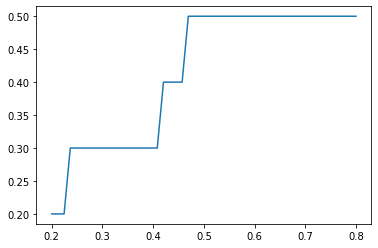

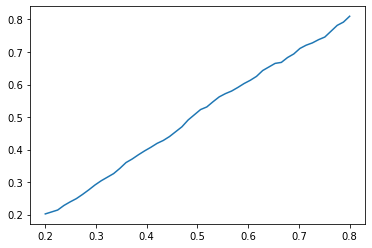

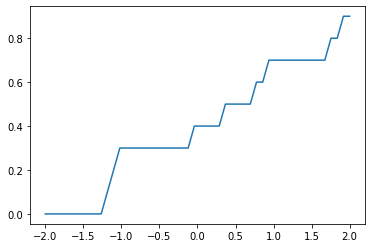

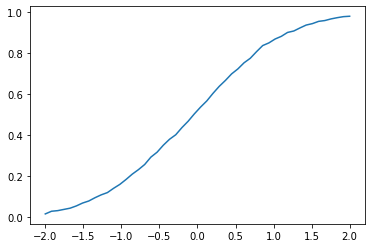

In [25]:
#Exercice 3

# For this exercice you may want to check the solution on quantecon, it might be more interesting.

import matplotlib.pyplot as plt
%matplotlib inline

class ECDF_n:
    def __init__(self,observations):
        self.observations = np.asarray(observations) # asarray can construct an array from a normal list or tuple.
    
    def __call__(self,x):
        return (self.observations <= x).sum()/self.observations.size
    
    def draw(self,a,b,step=20): 
        x_ax = np.linspace(a,b)
        plt.plot(x_ax,np.array([self(i) for i in x_ax]))
        plt.show()
F = ECDF_n(np.random.rand(10))
G = ECDF_n(np.random.rand(1000)) #Argument is a numpy array
H = ECDF_n(np.random.randn(10))
I = ECDF_n(np.random.randn(1000))
F.draw(0.2,0.8,step = 50)
G.draw(0.2,0.8)
H.draw(-2,2)
I.draw(-2,2)

## 2. Matplotlib

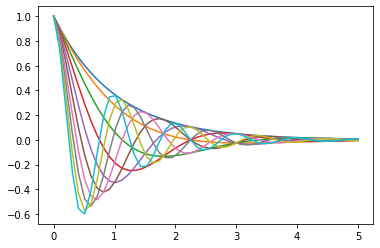

In [17]:
#Exercice 1
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def cos_exp(dm=np.linspace(0,5,50)):
    fig, ax = plt.subplots()
    for θ in np.linspace(0,2,10):
        ax.plot(dm,np.cos(np.pi*θ*dm)*np.exp(-dm))
    plt.show()

cos_exp()

## 3. Scipy

In [14]:
#Exercice 1
import numpy as np

f = lambda x: np.sin(4*(x-1/4)) + x + x**20 -1
def bisect_r(f,a,b,tol=10e-5):
    if b-a <= tol:
        return (a+b)/2
    middle = (a + b)/2
    if f(middle) <0:
        return bisect_r(f,middle,b)
    return bisect_r(f,a,middle)
bisect_r(f,0,1)

0.408294677734375

## 4. Numba

In [13]:
#Exercice 1
# You need to run the cell "An introductory example Exercice 3" before running this one

import quantecon as qe
from numba import njit

@njit
def mc_pi_nba(n):
    points = np.random.uniform(0,1,(n,2))
    points = (points - 0.5)**2
    s = np.sum(points,axis=1)
    return 4*((s <= 0.25).sum()/n)
n = 1_000_000
qe.tic()
print(f'π = {mc_pi_nba(n)} :Numba version')
time1 = qe.toc()

qe.tic()
print(f'π = {monte_carlo_pi(n)} :Normal version')
time2 = qe.toc()

print(f"Numba version is {time2/time1} times faster then the normal version when using {n:,} data points.")


π = 3.13962 :Numba version
TOC: Elapsed: 0:00:3.48
π = 3.139792 :Normal version
TOC: Elapsed: 0:00:17.83
Numba version is 5.113661001930787 times faster then the normal version when using 1,000,000 data points.


In [3]:
#Exercice 2

import numpy as np
from numba import njit
import quantecon as qe

def state(n,initial=1):
    all_states = np.empty(n,dtype=np.int_)
    all_states[0] = initial
    for i in range(1,n):
        if all_states[i-1] == 1:
            if np.random.rand() <= 0.2:
                all_states[i] = 0
            else:
                all_states[i] = 1
        else:
            if np.random.rand() <= 0.1:
                all_states[i] = 1
            else:
                all_states[i] = 0
    return all_states

state_numba = njit(state)

qe.tic()
print(f"Proportion of low states using numba function: {1 - state_numba(1_000_000).mean()}")
qe.toc()

qe.tic()
print(f"Proportion of low states using normal function: {1 - state(1_000_000).mean()}")
qe.toc()

Proportion of low states using numba function: 0.6637569999999999
TOC: Elapsed: 0:00:0.80
Proportion of low states using normal function: 0.666488
TOC: Elapsed: 0:00:7.06


7.060749530792236

## 5.Parallelization

In [6]:
######### THE 'PARALLEL' TARGET IS NOT SUPPORTED ON WINDOWS WHEN USING 32 BIT HARDWARE! ######
"""
Parallelization is harder than it seems!
If your code is not 'perfect' for multithreading, Python will crash!!
You have to be careful when to use 'prange', avoid using it with comprehension list, it will crash.
This code is copied directly from quantecon.org, other versions that I tried caused crashes.
"""
from numba import njit, prange
import quantecon as qe
import numpy as np
from random import uniform

@njit(parallel=True)
def calculate_pi(n=1_000_000):
    count = 0
    for i in prange(n):
        u, v = uniform(0, 1), uniform(0, 1)
        d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
        if d < 0.5:
            count += 1

    area_estimate = count / n
    return area_estimate * 4  # dividing by radius**2
qe.tic()
print(f'π = {calculate_pi(100_000_000)}')
qe.toc()

π = 3.14142544
TOC: Elapsed: 0:00:1.27


1.2798101902008057

In [1]:
!pip install --upgrade quantecon

## 6.Pandas

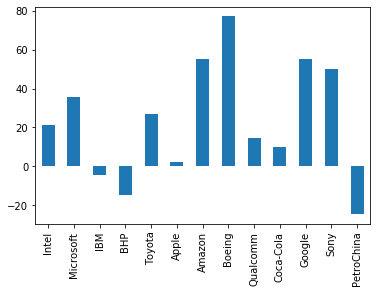

In [31]:
#Exercice 1
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/ticker_data.csv')
df.columns = ['Date','Intel','Microsoft','IBM','BHP','Toyota','Apple','Amazon','Boeing','Qualcomm','Coca-Cola','Google','Sony','PetroChina']
df = df.iloc[[0,-1],:]
df = df.set_index('Date')
type(df['Intel'][0])
change = {company:((df[company][1] - df[company][0])/df[company][0])*100 for company in df.columns}
df = df.append(change,ignore_index=True)
df.iloc[-1,:].plot(kind = 'bar')
    

# III. Advanced python programming
## 1. Writing good code

The equilibrium price is 2.93, and the equilibrium quantity is 0.34


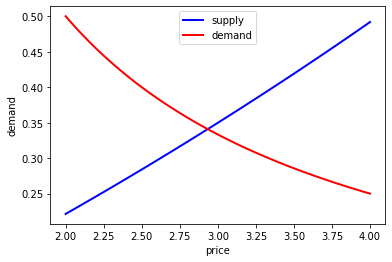

The equilibrium price is 3.25, and the equilibrium quantity is 0.38


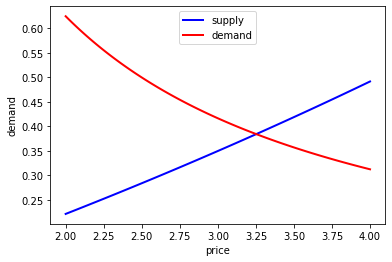

In [14]:
#Exercice 1

from scipy.optimize import brentq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class Equilibrium:
    def __init__(self,α=0.1,β=1,γ=1,δ=1):
        self.α, self.β, self.γ, self.δ = α, β, γ, δ
        self.p_star = brentq(lambda p:γ*p**(-δ)-(np.exp(α*p)-β),2,4) # Equilibrium price
        self.q_star = np.exp(α*self.p_star)-β # Equilibrium quantity
    def price_and_quantity(self):
        return f'The equilibrium price is {self.p_star:.2f}, and the equilibrium quantity is {self.q_star:.2f}'
    def plot(self):
        grid = np.linspace(2,4,100)
        qs = np.exp(self.α*grid) - self.β
        qd = self.γ*grid**(-self.δ)
        fig, ax = plt.subplots()
        ax.plot(grid, qs, 'b-', label="supply",lw=2)
        ax.plot(grid, qd, 'r-',label="demand", lw=2)
        ax.set_xlabel("price")
        ax.set_ylabel("demand")
        plt.legend(loc="upper center")
        plt.show()
o1 = Equilibrium()
o2 = Equilibrium(γ=1.25)
print(o1.price_and_quantity())
o1.plot()
print(o2.price_and_quantity())
o2.plot()

## 2. More language features

In [5]:
#Exercice 1

def fib_r(n):
    if n in [0,1]:
        return n
    else:
        return fib_r(n-1) + fib_r(n-2)
print(fib_r(10))

55


In [6]:
#Exercice 2

def column_iterator(target_file,column_number):
    with open(target_file,'r') as f:
        line = f.readline()
        while len(line) > 0:
            yield line.split(',')[column_number]
            line = f.readline()

for i in column_iterator('test_table.csv',4):
    print(i)

Close
9264.15
9344.64
9290.29
9038.69
9265.02
9093.73
9340.49
9298.61
9451.98
9432.83
9385.70
8977.37
8828.26
8493.77
8726.34
8707.99
8847.01
8727.30
8711.33
8924.75
8907.58
8755.26
8742.96
8842.68
8924.43
8964.11
8916.06
8595.01
8832.85
8857.93
8749.84
8719.78
8351.91
8109.53
8236.08
8626.97
8636.33
8479.99
8488.30
8215.53
7945.96
7972.17
7949.13
7704.15
7569.28
7198.25
7376.12
7054.98
7086.03
7173.10
7433.49
7290.96
7229.72
7280.15
7568.42
7457.93
7461.22
7268.56
7376.16
7416.38
7557.65
7534.44
7645.51
7750.17
7779.40
7705.36
7945.94
7969.03
8076.62
7949.65
8038.94
7825.51
7873.98
7994.05
8251.24
8106.29
8061.07
7682.14
7745.25
8051.74
7901.64
8065.79
8256.85
8230.15
8023.31
8438.45
8413.91
8836.80
8876.42
9239.24
9080.84
9043.12
8859.56
8747.17
8739.52
8599.50
8517.10
8723.78
8588.52
8667.23
8612.52
8568.02
8664.66
8235.87
8720.55
8660.24
8395.87
8329.05
7917.51
7924.24
8004.10
7863.69
8397.22
8512.27
8373.39
8213.22
8323.93
7910.79
7703.04
8273.22
8328.41
8522.58
8462.39
8238.64
86

11603.53
11616.70
11651.55
11630.13
11584.01
11577.44
11513.83
11414.28
11537.03
11576.75
11547.28
11488.74
11483.35
11514.03
11416.38
11415.88
11335.92
11311.51
11304.23
11160.88
11281.03
11217.45
11270.62
11300.05
11280.05
11329.67
11276.59
11266.33
11192.33
11027.94
11014.43
11133.65
11158.65
11037.29
11077.16
10835.41
10825.39
10947.22
11049.11
11077.94
11120.70
11159.46
11171.32
11192.17
11002.11
11008.90
11005.42
11035.83
11073.77
11045.95
10984.39
11088.58
11065.86
10938.44
11370.69
11563.17
11637.52
11670.30
11745.64
11874.75
11810.99
11827.16
11774.31
11667.54
11723.63
11668.95
11565.88
11599.82
11792.30
11761.10
11745.97
11739.12
11841.97
11879.81
11775.50
11873.18
11821.09
11850.25
11923.89
11864.91
11966.69
11886.91
11925.36
11873.05
11856.46
11813.71
11780.53
11740.60
11658.25
11531.15
11500.18
11597.71
11651.02
11660.12
11582.72
11601.68
11646.49
11632.20
11553.56
11473.35
11490.43
11499.86
11360.40
11389.35
11407.14
11384.40
11387.59
11320.58
11341.31
11376.57
11276.91
1

12840.10
13226.48
13430.22
13277.51
13174.84
13182.00
13312.35
13261.84
13262.14
13493.35
13773.89
13737.77
13765.92
13895.79
14067.70
14091.19
14176.83
13877.77
13910.67
13694.27
14054.03
13873.02
14043.92
14017.79
14084.85
14289.05
14529.41
14421.64
14425.46
13934.32
13973.03
13827.50
13743.18
13715.60
13765.67
13868.28
13641.79
13067.09
13254.89
13385.72
13352.44
13174.93
12620.27
12841.76
13383.76
13381.38
13242.78
13124.47
12937.86
12999.70
13072.36
13765.51
13638.33
13862.31
13214.54
12853.97
13103.94
12190.97
12232.98
12152.83
11843.59
11819.70
12171.37
12627.90
12650.56
12723.89
12687.74
12322.16
12261.80
12681.66
12883.54
13059.86
13201.14
13246.00
13073.36
13100.08
13248.36
13119.59
13175.49
13327.39
13284.06
13274.70
13422.83
13138.23
13366.01
13269.85
13385.52
13703.63
13779.55
13843.55
13826.65
13845.28
13696.06
13803.38
13893.58
13984.66
14032.42
13989.12
13873.92
13667.63
13584.45
13506.23
13347.74
13201.07
13432.65
13610.51
13867.61
13691.49
13785.69
13946.96
13981.49
1

20062.00
20049.00
20181.00
19515.00
19275.00
19151.00
18670.00
18613.00
18698.00
18735.00
18544.00
18552.00
18352.00
18093.00
18031.00
17934.00
17692.00
17847.00
17486.00
17703.00
18022.00
17716.00
17861.00
18129.00
18037.00
17870.00
18003.00
18190.00
18210.00
18472.00
18440.00
18044.00
18633.00
18494.00
18445.00
18054.00
17924.00
17900.00
18183.00
18268.00
18114.00
18199.00
18041.00
18274.00
18565.00
18429.00
18557.00
19022.00
18991.00
19070.00
18897.00
19035.00
19052.00
18599.00
18471.00
18751.00
18722.00
18688.00
18410.00
18314.00
18181.00
17867.00
18038.00
18186.00
18314.00
18086.00
18330.00
17864.00
18335.00
17797.00
17335.00
17689.00
17909.00
18014.00
17358.00
17480.00
18090.00
18144.00
18093.00
18119.00
17304.00
18074.00
18680.00
18896.00
19446.00
19361.00
19369.00
19292.00
19549.00
19162.00
19690.00
19571.00
20093.00
20413.00
20422.00
20341.00
20501.00
20568.00
20822.00
20604.00
20277.00
20944.00
20660.00
20631.00
20675.00
21020.00
21036.00
21345.00
21418.00
21294.00
21216.00
2

20622.00
20919.00
20455.00
20207.00
19624.00
19704.00
19591.00
19773.00
19828.00
20112.00
20298.00
20676.00
20533.00
20740.00
19882.00
19892.00
19967.00
19829.00
19487.00
19759.00
19447.00
19099.00
18591.00
18963.00
19048.00
18789.00
18765.00
18451.00
18492.00
18784.00
18537.00
18728.00
18173.00
17968.00
18086.00
18038.00
17905.00
17859.00
17848.00
17686.00
16818.00
16760.00
16854.00
16864.00
16880.00
16953.00
16907.00
16799.00
16863.00
16821.00
17010.00
16982.00
17010.00
16916.00
17118.00
16852.00
17090.00
17022.00
17282.00
17333.00
17191.00
17222.00
17186.00
17134.00
17024.00
17063.00
16510.00
16493.00
16287.00
16337.00
16539.00
16510.00
16799.00
16617.00
16516.00
16518.00
16681.00
16590.00
16635.00
16781.00
16783.00
16843.00
16994.00
16925.00
17286.00
17189.00
17557.00
17649.00
17691.00
17645.00
17681.00
17438.00
17269.00
17481.00
17290.00
17441.00
17501.00
17406.00
17282.00
17207.00
17296.00
17260.00
17394.00
17313.00
17684.00
17471.00
17479.00
17302.00
17096.00
17034.00
16871.00
1

32078.00
32065.00
31881.00
31829.00
31686.00
31498.00
31361.00
31581.00
31568.00
31646.00
31512.00
31568.00
31558.00
31333.00
31170.00
31311.00
31355.00
31228.00
31298.00
31143.00
31143.00
31007.00
30678.00
30210.00
30184.00
30244.00
30159.00
30051.00
29868.00
29686.00
29775.00
29698.00
29568.00
29470.00
29537.00
29706.00
29755.00
29598.00
29672.00
29793.00
29759.00
30051.00
29669.00
29615.00
29532.00
29541.00
29579.00
29318.00
28983.00
29407.00
29340.00
29430.00
29430.00
29284.00
29180.00
29077.00
28996.00
28829.00
28521.00
28490.00
28166.00
28213.00
28007.00
27866.00
27953.00
27985.00
28014.00
27983.00
27741.00
27723.00
27621.00
27421.00
27282.00
27401.00
27391.00
27294.00
27142.00
27269.00
27307.00
27273.00
27409.00
27470.00
27258.00
27172.00
27405.00
27501.00
27546.00
27924.00
27700.00
27752.00
27500.00
27334.00
27428.00
27713.00
27549.00
27901.00
27866.00
27806.00
27794.00
27757.00
27647.00
27740.00
27504.00
27321.00
27342.00
27117.00
26934.00
27366.00
27512.00
27379.00
27565.00
2

12405.00
12419.00
12297.00
12264.00
12348.00
12415.00
12499.00
12476.00
12509.00
12412.00
12322.00
12287.00
12194.97
12201.00
12147.00
12128.00
12152.00
12157.00
12149.00
12148.00
12082.00
12026.00
12028.00
12009.00
11941.00
11867.00
11823.00
11891.00
11947.00
11993.00
11961.00
11843.00
11799.00
11737.00
11856.00
11859.00
11868.00
11976.00
11910.00
11887.00
11933.00
11824.00
11812.00
11824.00
11764.00
11680.00
11575.00
11558.00
11543.00
11543.00
11514.00
11492.00
11474.00
11514.00
11558.00
11460.00
11456.00
11419.00
11340.00
11382.00
11251.00
11317.00
11466.00
11560.00
11543.00
11557.00
11514.00
11429.00
11367.00
11248.00
11184.00
11163.00
11208.00
11250.00
11257.00
11284.00
11271.00
11302.00
11321.00
11265.00
11235.00
11239.00
11167.00
11179.00
11298.00
11374.00
11250.00
11170.00
11253.00
11172.00
11177.00
11155.00
11152.00
11179.00
11030.00
11078.00
10845.00
10760.00
10743.00
10758.00
10780.00
10685.00
10697.00
10669.00
10677.00
10738.00
10642.00
10587.00
10540.00
10654.00
10649.00
1

In [10]:
%%file numbers.txt
prices
3
8

7
21

Writing numbers.txt


In [12]:
#Exercice 3 #The cell above creates the file

def sum_file(file_name):
    x = 0
    with open(file_name,'r') as f:
        s = f.readline()
        while len(s)>0:
            try:
                x += int(s)
                s = f.readline()
            except ValueError:
                s = f.readline()
    return x

sum_file('numbers.txt')

39